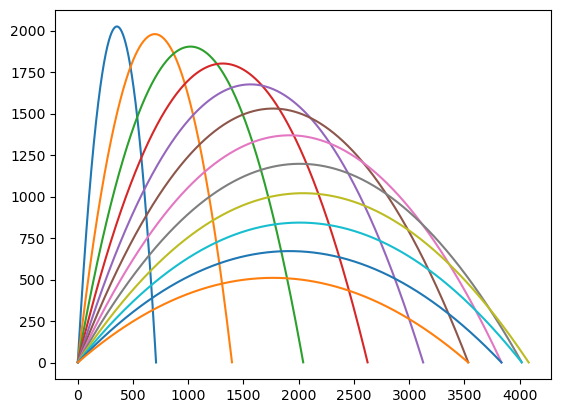

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import math
v0=200
for angle in range(85,25,-5):
    theta = math.radians(angle)
    v0x=v0*math.cos(theta)
    v0y=v0*math.sin(theta)
    t=np.arange(0,100,0.01)
    x=v0x*t
    y=v0y*t-0.5*9.8*t*t
    xx=x[y>0]
    yy=y[y>0]
    plt.plot(xx, yy)
plt.show()

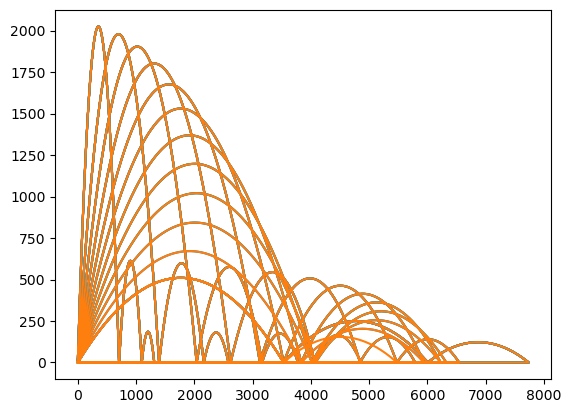

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import math
v0=200
damping=0.55
for angle in range(85, 25, -5):
    theta=math.radians(angle)
    v0x=v0*math.cos(theta)
    v0y=v0*math.sin(theta)
    x_values=[]
    y_values=[]
    t0 = 0
    x0 = 0
    y0 = 0
    vy = v0y
    vx = v0x
    for _ in range(3):
        t_flight = (vy + np.sqrt(vy**2 + 2 * g * y0)) / 9.8
        t = np.linspace(0, t_flight, int(t_flight / 0.01))
        x = x0 + vx * t
        y = y0 + vy * t - 0.5 * 9.8 * t**2
        x_total.append(x)
        y_total.append(y)
        y0 = 0
        x0 = x[-1]
        vy = - (vy - g * t_flight) * damping
        if abs(vy) < 50:
            break
    x_all = np.concatenate(x_total)
    y_all = np.concatenate(y_total)
    y_all[y_all < 0] = 0
    plt.plot(x_all, y_all)
plt.show()

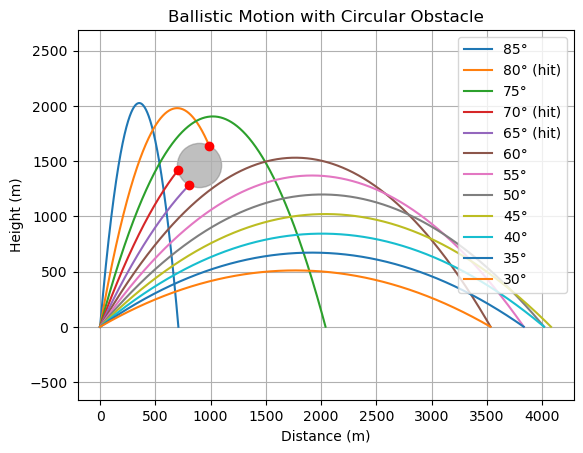

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math

v0 = 200
g = 9.8
obstacle_center = (900, 1460)  # (x, y) position of circular obstacle
obstacle_radius = 200          # radius of the obstacle

for angle in range(85, 25, -5):
    theta = math.radians(angle)
    v0x = v0 * math.cos(theta)
    v0y = v0 * math.sin(theta)

    t = np.arange(0, 100, 0.01)
    x = v0x * t
    y = v0y * t - 0.5 * g * t**2

    # Check for collision with the obstacle
    distance = np.sqrt((x - obstacle_center[0])**2 + (y - obstacle_center[1])**2)
    hit_indices = np.where(distance <= obstacle_radius)[0]

    if len(hit_indices) > 0:
        # Cut trajectory at first collision point
        idx = hit_indices[0]
        x = x[:idx+1]
        y = y[:idx+1]
        plt.plot(x, y, label=f"{angle}° (hit)")
        plt.plot(x[-1], y[-1], 'ro')  # mark collision point
    else:
        # Normal full trajectory (until it hits the ground)
        valid = y >= 0
        plt.plot(x[valid], y[valid], label=f"{angle}°")

# Draw the obstacle
circle = plt.Circle(obstacle_center, obstacle_radius, color='gray', alpha=0.5)
plt.gca().add_patch(circle)

plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
plt.title('Ballistic Motion with Circular Obstacle')
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()
